# Climate model evaluation - bias

In [1]:
import importlib
import matplotlib.pyplot as plt
import climag.climag as cplt
import seaborn as sns

In [30]:
def plot_bias(dataset):
    for v in list(dataset.data_vars):
        fig = dataset[v].plot.contourf(x="x", y="y", col="model", robust=True, subplot_kws={"projection": cplt.projection_hiresireland}, transform=cplt.projection_lambert_conformal, levels=14, xlim=(-1.775, 1.6), ylim=(-2.1, 2.1), cbar_kwargs={"location": "bottom", "aspect": 30}, figsize=(12, 5), cmap="RdBu", center=0)
        fig.set_titles("{value}", weight="semibold", fontsize=14)
        plt.show()

In [17]:
importlib.reload(cplt)

<module 'climag.climag' from '/mnt/Backup/Documents/Git/ClimAg/ClimAg/climag/climag.py'>

In [2]:
mera = cplt.load_obs_data()

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(


In [3]:
mera

<xarray.Dataset> Size: 3GB
Dimensions:            (time: 9131, y: 166, x: 158)
Coordinates:
  * x                  (x) float64 1kB 4.15e+05 4.175e+05 ... 8.05e+05 8.075e+05
  * y                  (y) float64 1kB 4.075e+05 4.1e+05 ... 8.175e+05 8.2e+05
    height             float64 8B 0.0
    Lambert_Conformal  int64 8B 0
  * time               (time) datetime64[ns] 73kB 1981-01-01 ... 2005-12-31
    spatial_ref        int64 8B 0
Data variables:
    bm                 (time, y, x) float32 958MB dask.array<chunksize=(365, 166, 158), meta=np.ndarray>
    gro                (time, y, x) float32 958MB dask.array<chunksize=(365, 166, 158), meta=np.ndarray>
    bm_c               (time, y, x) float32 958MB dask.array<chunksize=(365, 166, 158), meta=np.ndarray>
Attributes:
    creation_date:  2023-03-25 20:11:18.719312+00:00
    contact:        nstreethran@ucc.ie
    frequency:      day
    references:     https://github.com/ClimAg
    input_dataset:  IE_MERA_FC3hr_3_day

In [8]:
ds_ec = cplt.load_all_data("EURO-CORDEX", hist_only=True)

In [9]:
ds_ec.keys()

dict_keys(['CNRM-CM5_historical', 'EC-EARTH_historical', 'HadGEM2-ES_historical', 'MPI-ESM-LR_historical'])

In [10]:
ds_ec["CNRM-CM5_historical"]

<xarray.Dataset> Size: 134MB
Dimensions:       (model: 1, exp: 1, time: 9131, rlat: 33, rlon: 37, bnds: 2)
Coordinates:
    lat           (rlat, rlon) float64 10kB dask.array<chunksize=(33, 37), meta=np.ndarray>
    lon           (rlat, rlon) float64 10kB dask.array<chunksize=(33, 37), meta=np.ndarray>
  * rlat          (rlat) float64 264B 3.685 3.795 3.905 ... 6.985 7.095 7.205
  * rlon          (rlon) float64 296B -17.27 -17.16 -17.05 ... -13.41 -13.3
  * time          (time) datetime64[ns] 73kB 1981-01-01T12:00:00 ... 2005-12-...
    height        float64 8B 2.0
    rotated_pole  |S1 1B b''
    time_bnds     (time, bnds) datetime64[ns] 146kB dask.array<chunksize=(365, 2), meta=np.ndarray>
  * exp           (exp) <U10 40B 'historical'
  * model         (model) <U8 32B 'CNRM-CM5'
    spatial_ref   int64 8B 0
Dimensions without coordinates: bnds
Data variables:
    bm            (model, exp, time, rlat, rlon) float32 45MB dask.array<chunksize=(1, 1, 365, 33, 37), meta=np.ndarray>
    gro           (model, exp, time, rlat, rlon) float32 45MB dask.array<chunksize=(1, 1, 365, 33, 37), meta=np.ndarray>
    bm_c          (model, exp, time, rlat, rlon) float32 45MB dask.array<chunksize=(1, 1, 365, 33, 37), meta=np.ndarray>
Attributes:
    creation_date:  2023-03-10 16:21:55.203354+00:00
    contact:        nstreethran@ucc.ie
    frequency:      day
    references:     https://github.com/ClimAg
    input_dataset:  IE_EURO-CORDEX_RCA4_CNRM-CM5_historical

In [13]:
ds_ec_ann, mera_ann = cplt.regrid_climate_model_data(mera, ds_ec, skipna=True)

In [14]:
ds_ec_ann

<xarray.Dataset> Size: 31MB
Dimensions:            (model: 4, exp: 1, year: 25, y: 166, x: 158)
Coordinates:
  * year               (year) int64 200B 1981 1982 1983 1984 ... 2003 2004 2005
  * model              (model) <U10 160B 'CNRM-CM5' 'EC-EARTH' ... 'MPI-ESM-LR'
    rotated_pole       |S1 1B b''
  * exp                (exp) <U10 40B 'historical'
    height             float64 8B 0.0
  * x                  (x) float64 1kB 4.15e+05 4.175e+05 ... 8.05e+05 8.075e+05
    Lambert_Conformal  int64 8B 0
  * y                  (y) float64 1kB 4.075e+05 4.1e+05 ... 8.175e+05 8.2e+05
    spatial_ref        int64 8B 0
Data variables:
    bm                 (model, exp, year, y, x) float32 10MB 3.403e+38 ... 3....
    gro                (model, exp, year, y, x) float32 10MB 3.403e+38 ... 3....
    bm_c               (model, exp, year, y, x) float32 10MB 3.403e+38 ... 3....
Attributes:
    creation_date:  2023-03-10 16:21:55.203354+00:00
    contact:        nstreethran@ucc.ie
    frequency:      day
    references:     https://github.com/ClimAg
    input_dataset:  IE_EURO-CORDEX_RCA4_CNRM-CM5_historical

In [15]:
mera_ann

<xarray.Dataset> Size: 8MB
Dimensions:            (year: 25, y: 166, x: 158)
Coordinates:
  * x                  (x) float64 1kB 4.15e+05 4.175e+05 ... 8.05e+05 8.075e+05
  * y                  (y) float64 1kB 4.075e+05 4.1e+05 ... 8.175e+05 8.2e+05
    height             float64 8B 0.0
    Lambert_Conformal  int64 8B 0
    spatial_ref        int64 8B 0
  * year               (year) int64 200B 1981 1982 1983 1984 ... 2003 2004 2005
Data variables:
    bm                 (year, y, x) float32 3MB dask.array<chunksize=(1, 166, 158), meta=np.ndarray>
    gro                (year, y, x) float32 3MB dask.array<chunksize=(1, 166, 158), meta=np.ndarray>
    bm_c               (year, y, x) float32 3MB dask.array<chunksize=(1, 166, 158), meta=np.ndarray>
Attributes:
    creation_date:  2023-03-25 20:11:18.719312+00:00
    contact:        nstreethran@ucc.ie
    frequency:      day
    references:     https://github.com/ClimAg
    input_dataset:  IE_MERA_FC3hr_3_day

In [18]:
bias_abs_ec, bias_rel_ec = cplt.calc_bias(mera_ann, ds_ec_ann)

In [19]:
bias_abs_ec

<xarray.Dataset> Size: 31MB
Dimensions:            (year: 25, model: 4, exp: 1, x: 158, y: 166)
Coordinates:
  * year               (year) int64 200B 1981 1982 1983 1984 ... 2003 2004 2005
  * model              (model) <U10 160B 'CNRM-CM5' 'EC-EARTH' ... 'MPI-ESM-LR'
    rotated_pole       |S1 1B b''
  * exp                (exp) <U10 40B 'historical'
    height             float64 8B 0.0
  * x                  (x) float64 1kB 4.15e+05 4.175e+05 ... 8.05e+05 8.075e+05
    Lambert_Conformal  int64 8B 0
  * y                  (y) float64 1kB 4.075e+05 4.1e+05 ... 8.175e+05 8.2e+05
    spatial_ref        int64 8B 0
Data variables:
    bm                 (model, exp, year, y, x) float32 10MB dask.array<chunksize=(4, 1, 1, 166, 158), meta=np.ndarray>
    gro                (model, exp, year, y, x) float32 10MB dask.array<chunksize=(4, 1, 1, 166, 158), meta=np.ndarray>
    bm_c               (model, exp, year, y, x) float32 10MB dask.array<chunksize=(4, 1, 1, 166, 158), meta=np.ndarray>

In [20]:
bias_rel_ec

<xarray.Dataset> Size: 31MB
Dimensions:            (year: 25, model: 4, exp: 1, x: 158, y: 166)
Coordinates:
  * year               (year) int64 200B 1981 1982 1983 1984 ... 2003 2004 2005
  * model              (model) <U10 160B 'CNRM-CM5' 'EC-EARTH' ... 'MPI-ESM-LR'
    rotated_pole       |S1 1B b''
  * exp                (exp) <U10 40B 'historical'
    height             float64 8B 0.0
  * x                  (x) float64 1kB 4.15e+05 4.175e+05 ... 8.05e+05 8.075e+05
    Lambert_Conformal  int64 8B 0
  * y                  (y) float64 1kB 4.075e+05 4.1e+05 ... 8.175e+05 8.2e+05
    spatial_ref        int64 8B 0
Data variables:
    bm                 (model, exp, year, y, x) float32 10MB dask.array<chunksize=(4, 1, 1, 166, 158), meta=np.ndarray>
    gro                (model, exp, year, y, x) float32 10MB dask.array<chunksize=(4, 1, 1, 166, 158), meta=np.ndarray>
    bm_c               (model, exp, year, y, x) float32 10MB dask.array<chunksize=(4, 1, 1, 166, 158), meta=np.ndarray>

In [31]:
bias_abs_ec_mean = bias_abs_ec.mean(dim="year", skipna=True)

In [21]:
bias_rel_ec_mean = bias_rel_ec.mean(dim="year", skipna=True)

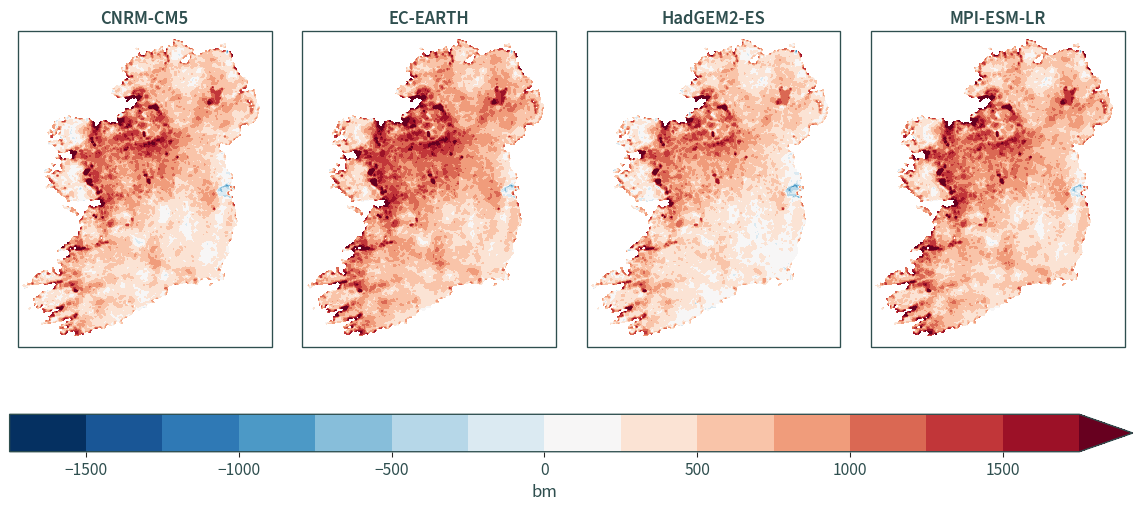

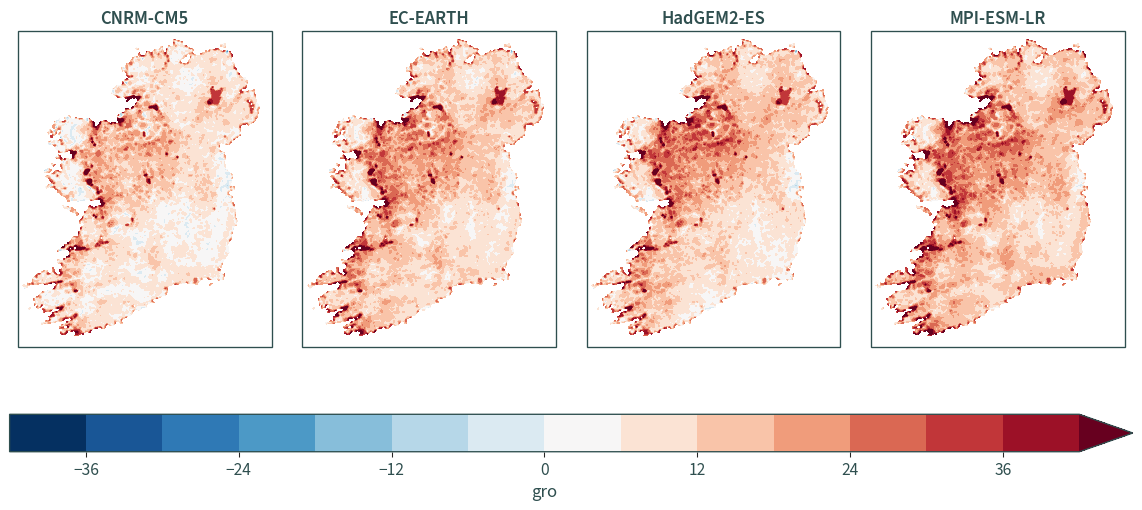

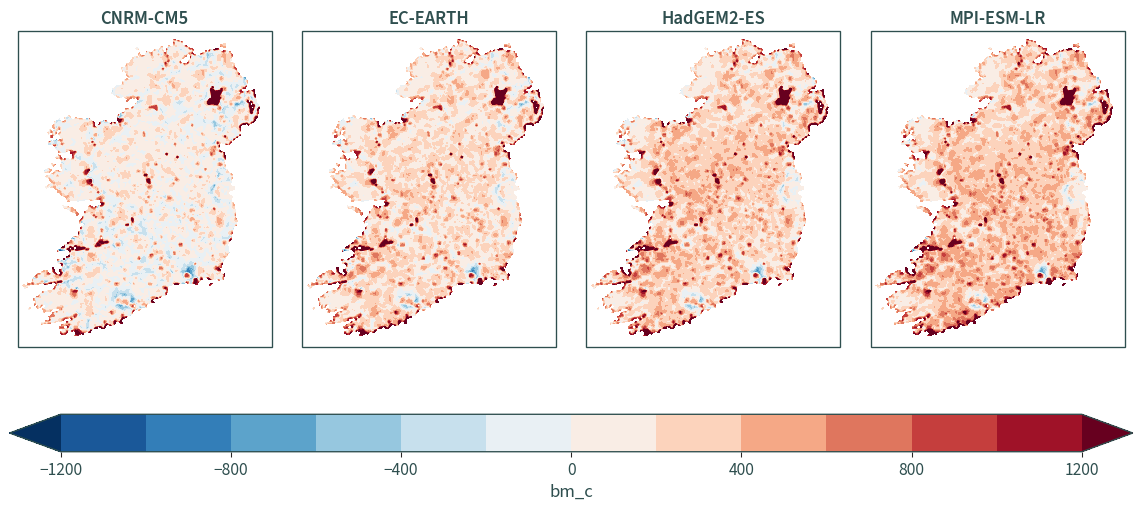

In [32]:
plot_bias(bias_abs_ec_mean)

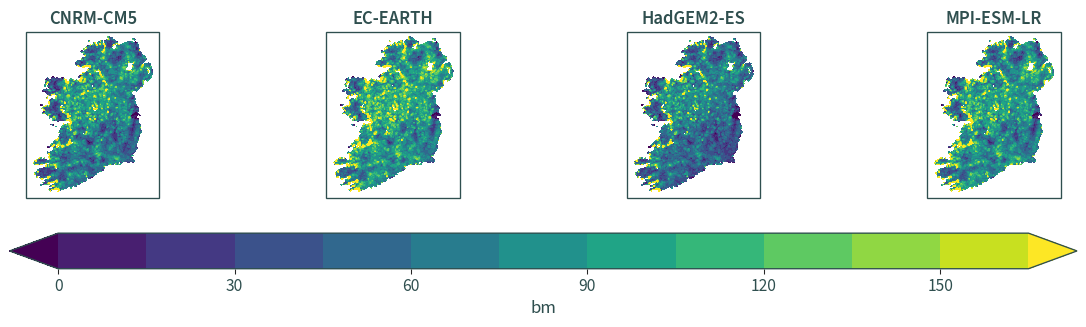

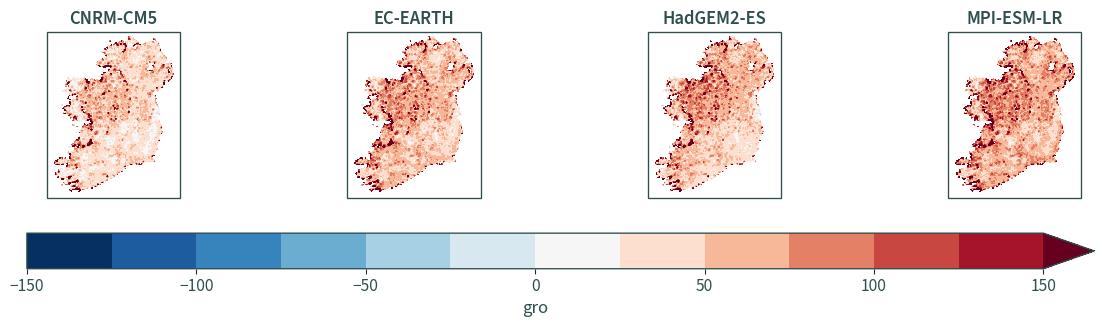

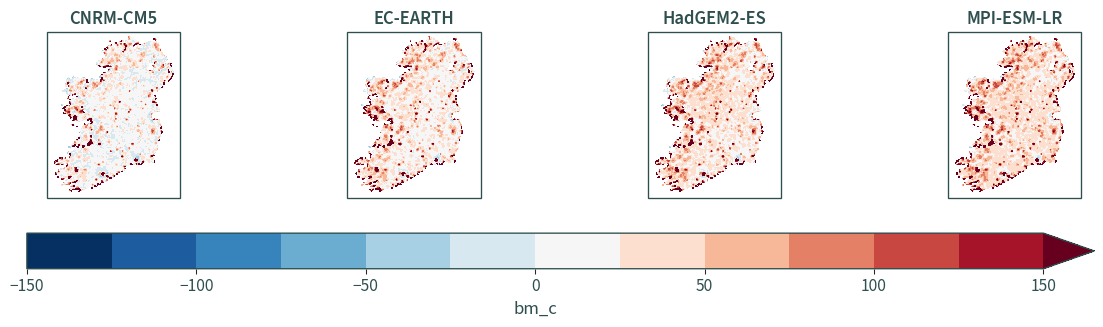

In [27]:
plot_bias(bias_rel_ec_mean)